In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Attributes:

Age:Age of the patient [years]</font>

Sex: Sex of the patient [M: Male, F: Female]</font>

ChestPainType:Ch Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</font>

RestingBP: Resting blood pressure [mm Hg]</font>

Cholesterol: Serum cholesterol [mm/dl]</font>

FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</font>

RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</font>
MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]</font>

ExerciseAngina:Exercise-induced angina [Y: Yes, N: No]</font>

Oldpeak: Oldpeak = ST [Numeric value measured in depression]</font>

ST_Slope:The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</font>

HeartDisease: Output class [1: heart disease, 0: Normal]</font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

Data doesn't have a duplicated value or na values.

In [8]:
df.shape

(918, 12)

In [9]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [11]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [12]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [13]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [14]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [15]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [16]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [17]:
count = df['RestingECG'].value_counts()
count

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [18]:
count.values

array([552, 188, 178], dtype=int64)

In [19]:
count.index

Index(['Normal', 'LVH', 'ST'], dtype='object', name='RestingECG')

Text(0.5, 1.0, 'Distribution of Resting ECG Categories')

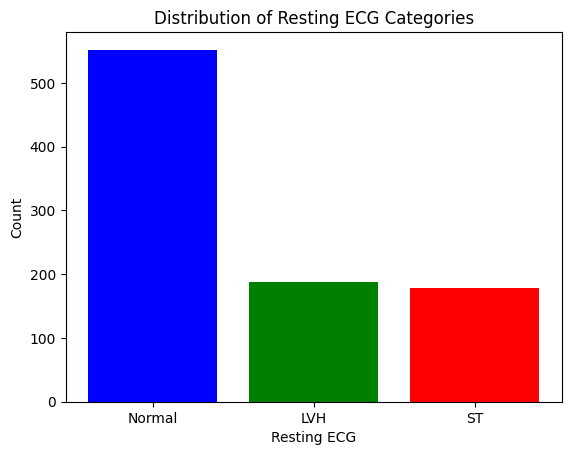

In [20]:
plt.bar(count.index, count.values, color=['blue','green','red'])

plt.xlabel('Resting ECG')
plt.ylabel('Count')
plt.title('Distribution of Resting ECG Categories')

In [21]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [22]:
count_ctype = df['ChestPainType'].value_counts()
count_ctype

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of ChestPainTypes')

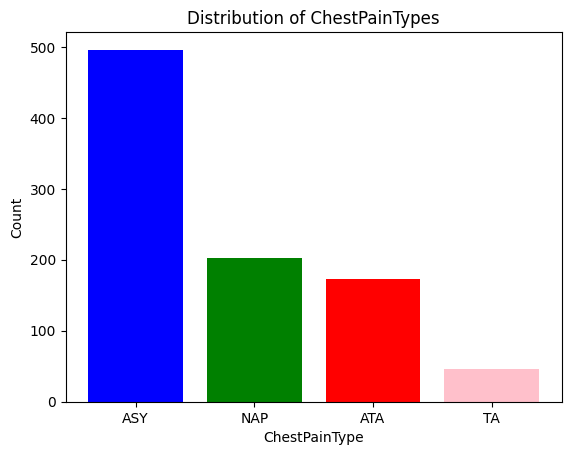

In [23]:
plt.bar(count_ctype.index, count_ctype.values, color=['blue','green','red','pink'])

plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.title('Distribution of ChestPainTypes')

The effect of chest pain type on heart disease : 

In [24]:
count_slope = df['ST_Slope'].value_counts()
count_slope

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Text(0.5, 1.0, 'ST Slope Distribution')

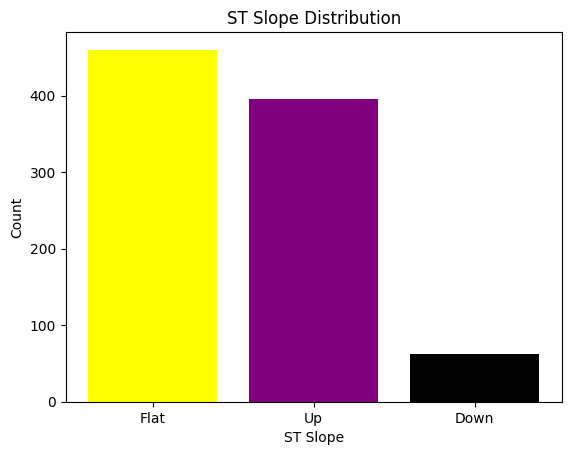

In [25]:
plt.bar(count_slope.index, count_slope.values, color=['yellow','purple','black'])

plt.xlabel('ST Slope')
plt.ylabel('Count')
plt.title('ST Slope Distribution')

In [26]:
count_sex = df['Sex'].value_counts()
count_sex

Sex
M    725
F    193
Name: count, dtype: int64

Text(0.5, 1.0, 'Sex Distribution')

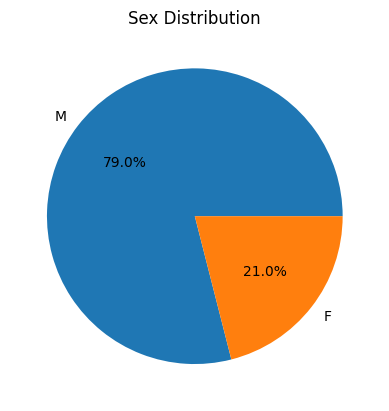

In [27]:
plt.pie(count_sex.values,labels=count_sex.index, autopct='%1.1f%%')
plt.title('Sex Distribution')

In [28]:
count_exang = df['ExerciseAngina'].value_counts()
count_exang

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Text(0.5, 1.0, 'Exercise induced angina distribution')

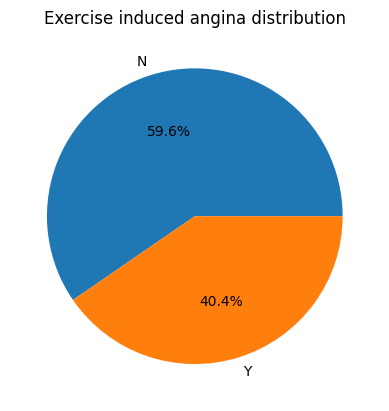

In [29]:
plt.pie(count_exang.values,labels=count_exang.index, autopct='%1.1f%%')
plt.title('Exercise induced angina distribution')

In [122]:
df.pivot_table(index='ExerciseAngina',columns='HeartDisease',aggfunc={'HeartDisease':'count'}).style.background_gradient(cmap='Reds')

When exercise angina is Y the percentage of patients is more than the non-patients.
When exercise angina is N the percentage of non patients is more than the patients.

(-1.0999999233188131, 1.099999996348515, -1.09999925482614, 1.0999956373547308)

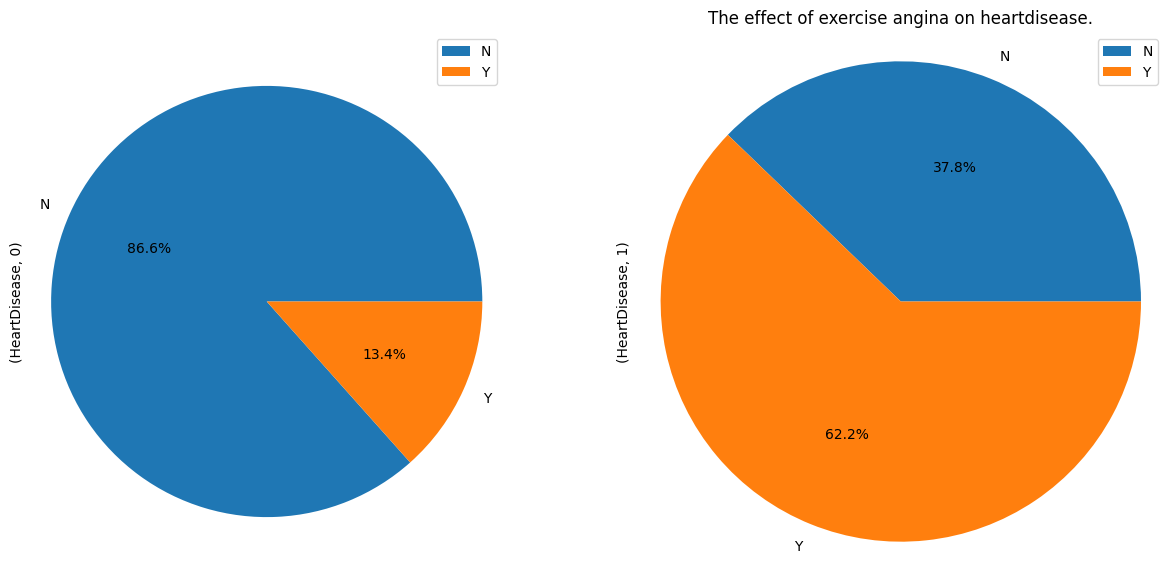

In [127]:
df.pivot_table(index='ExerciseAngina', columns='HeartDisease', aggfunc={'HeartDisease':'count'}).plot.pie(autopct='%1.1f%%', figsize=(15,7), subplots=True)
plt.title('The effect of exercise angina on heartdisease.')
plt.axis('equal')

Text(0.5, 1.0, 'Distribution of Heart Disease Cases')

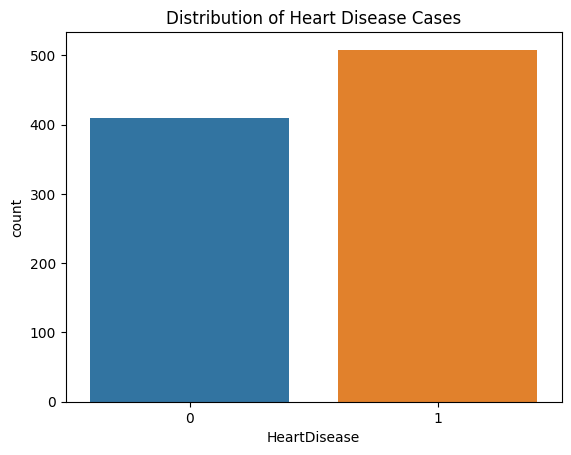

In [30]:
sn.countplot(data=df, x='HeartDisease')
plt.title('Distribution of Heart Disease Cases')

In [31]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

Text(0.5, 1.0, 'The relationship between (sex) and (HeartDisease)')

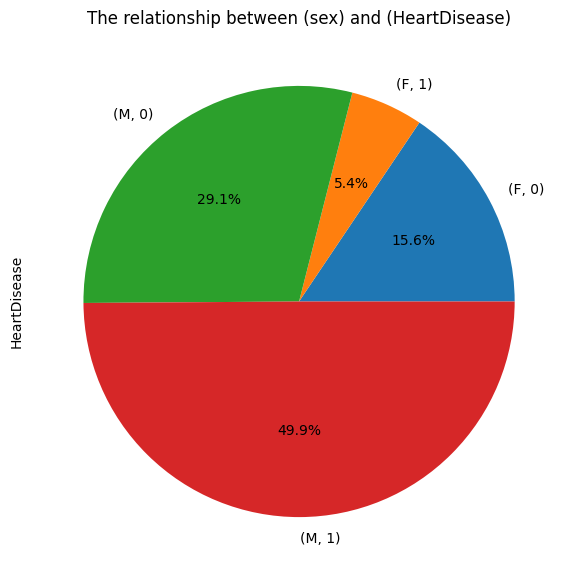

In [32]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count().plot.pie(autopct='%1.1f%%',figsize=(15,7))
plt.title('The relationship between (sex) and (HeartDisease)')

In [33]:
df[df['HeartDisease']==1]['ChestPainType'].value_counts()

ChestPainType
ASY    392
NAP     72
ATA     24
TA      20
Name: count, dtype: int64

In [34]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### the most common type of chest pain that affects the disease : 

In [35]:
fig=px.pie(df,values='HeartDisease',names='ChestPainType',template='plotly_dark',color_discrete_sequence=px.colors.sequential.RdBu,title='The effect of the type of chest pain on the disease')
fig.update_traces(textposition='inside',textinfo='percent+label')

🔘 order of the type of chest pain on the disease :-

1- ASY

2- NAP

3- ATA

4- TA

In [36]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [37]:
df.groupby('HeartDisease')['RestingECG'].get_group(1).value_counts()

RestingECG
Normal    285
ST        117
LVH       106
Name: count, dtype: int64

the most type of heart disease is normal 

In [38]:
px.histogram(df, x='RestingECG', color='HeartDisease',template='plotly_dark',barmode='group',color_discrete_sequence=['grey','green'], title='The effect of RestingECG on heartdisease')

In [85]:
fig = px.pie(df, values='HeartDisease', names='RestingECG', title='<b>The effect of RestingECG on heartdisease</b>', hole=.5, hover_data='HeartDisease',)
fig.update_layout(annotations=[dict(text='<b>RestingECG</b>', x=0.5, y=0.5, font_size=19,
                                showarrow=False)])

fig.update_traces(textposition='inside', textinfo='percent+label')



In [65]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


RestingBP : normal 0 : 120/80
high 1 : 140/ 90
low : 90/60
cholesterol : 
fastingBS : 3.9-5.6 ML
MAXHR : >100, <60
EXERCISE ANGINA : YES NOT NORMAL 


 It is clear that the most susceptible type of heart disease is Normal

In [39]:
df.groupby(['ExerciseAngina','HeartDisease'])['HeartDisease'].count()

ExerciseAngina  HeartDisease
N               0               355
                1               192
Y               0                55
                1               316
Name: HeartDisease, dtype: int64

In [40]:
px.histogram(df, x='ExerciseAngina', color='HeartDisease',template='plotly_dark',barmode='group',color_discrete_sequence=['#71AEC2 ','#D58989'],title='The effect of the Exercise Angina on the disease')

The number of patients is more than the number of healthy people

The effect of the slope of the peak exercise on the disease : 

In [43]:
df[df['HeartDisease']==1]['ST_Slope'].value_counts()

ST_Slope
Flat    381
Up       78
Down     49
Name: count, dtype: int64

In [45]:
px.histogram(df, x='ST_Slope',color='HeartDisease',template='plotly_dark',barmode='group',color_discrete_sequence=['#71AEC2','#D58989'], title='The effect of the slope of the peak exercise one the disease')

we notice that when the st_slope is flat the chances of having a heart disease are so high.

In [59]:
df.groupby(['FastingBS','HeartDisease'])['HeartDisease'].count()

FastingBS  HeartDisease
0          0               366
           1               338
1          0                44
           1               170
Name: HeartDisease, dtype: int64

In [60]:
px.histogram(df, x='FastingBS', color='HeartDisease', barmode='group', color_discrete_sequence=['#71AEC2','#D58989'], title='The effects of fasting blood sugar on disease')

🔘 For Fasting blood sugar :-

Most people in the data----> fastingBS < 120 mg/dl,
Few people in the data------> fastingBS > 120 mg/dl


C:\Users\imane\AppData\Local\Temp\ipykernel_20388\3563679259.py:1: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



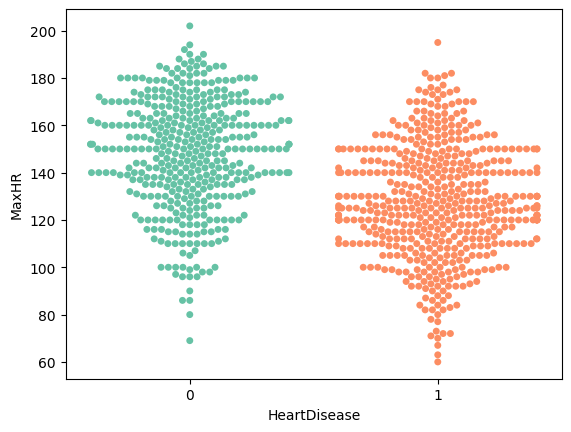

In [50]:
sn.swarmplot(data=df, x='HeartDisease', y='MaxHR', palette='Set2')

# distribution of resting blood pressure by disease :

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Text(0.5, 1.0, 'Distribution of maximum heart rate by heart disease')

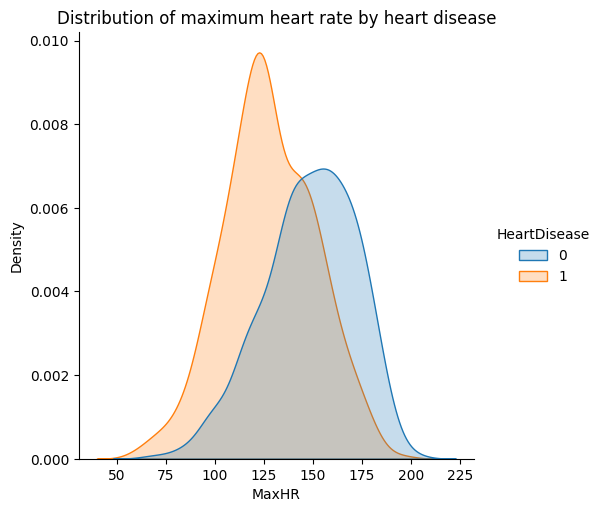

In [55]:
sn.displot(data= df, x='MaxHR',hue='HeartDisease',kind='kde',fill=True)
plt.title('Distribution of maximum heart rate by heart disease')

In [131]:
df['MaxHR_cat'] = pd.cut(df['MaxHR'],3) # deviding the column into 3 sections equally, each sections define the average disease.

In [141]:
df['MaxHR_cat']

0        (154.667, 202.0]
1        (154.667, 202.0]
2       (59.858, 107.333]
3      (107.333, 154.667]
4      (107.333, 154.667]
              ...        
913    (107.333, 154.667]
914    (107.333, 154.667]
915    (107.333, 154.667]
916      (154.667, 202.0]
917      (154.667, 202.0]
Name: MaxHR_cat, Length: 918, dtype: category
Categories (3, interval[float64, right]): [(59.858, 107.333] < (107.333, 154.667] < (154.667, 202.0]]

In [133]:
df[['MaxHR_cat','HeartDisease']].groupby('MaxHR_cat').mean().sort_values(by='HeartDisease', ascending=False).style.background_gradient(cmap='Blues')

,HeartDisease
MaxHR_cat,
"(59.858, 107.333]",0.812500
"(107.333, 154.667]",0.618538
"(154.667, 202.0]",0.285714


In [142]:
px.histogram(df, x='HeartDisease',facet_col='MaxHR_cat', barmode='group', color='HeartDisease',title='The distribution of maximum heart rate achieved by disease')

c:\Users\imane\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Text(0.5, 1.0, 'Distribution of resting blood sugar by heart disease')

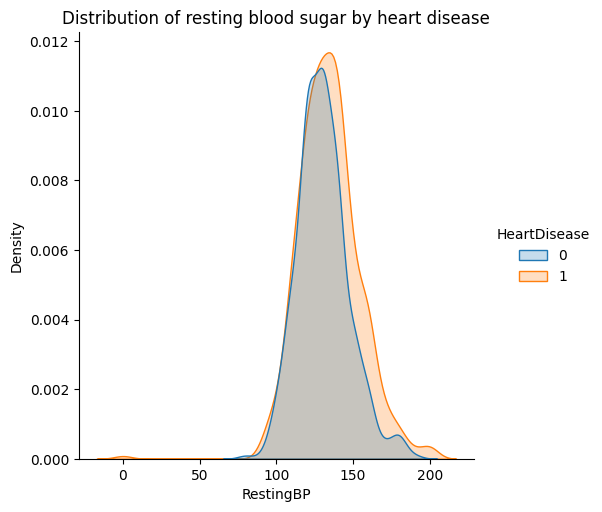

In [57]:
sn.displot(data= df, x='RestingBP',hue='HeartDisease',kind='kde',fill=True)
plt.title('Distribution of resting blood sugar by heart disease')

the most susceptible type of heart disease is BP = 140

In [58]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

old peak cholesterol fastingbs

In [63]:
px.histogram(df,x='ChestPainType', color='HeartDisease',histnorm='percent', barmode='group',color_discrete_sequence=['#71AEC2','#D58989'], title='The effects of chestpaintype on heart disease')

The effect of cholesterol on heart disease : 

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

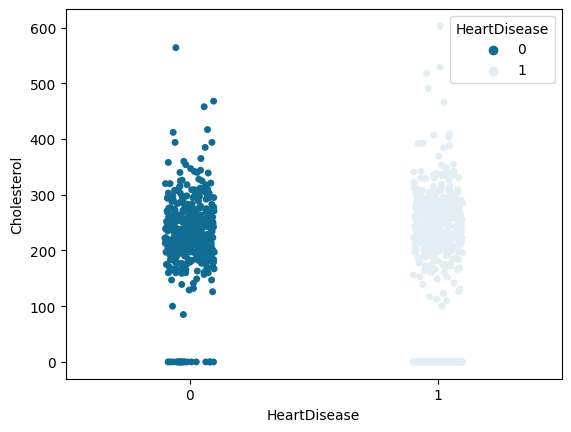

In [100]:
sn.stripplot(data= df, x='HeartDisease', y='Cholesterol', hue='HeartDisease', palette=['#106c93','#E2EEF3'], jitter=True)

The effect of old peak on heart disease : 

In [114]:
fig = px.violin(df, color='HeartDisease', x='HeartDisease',y='Oldpeak', title='<b>The effect of oldpeak on heartdisease</b>', violinmode='overlay',box=True,points='all')
fig.show()

Continuous features exploration : 

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    object  
 2   ChestPainType   918 non-null    object  
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    object  
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    object  
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    object  
 11  HeartDisease    918 non-null    int64   
 12  MaxHR_cat       918 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 87.3+ KB


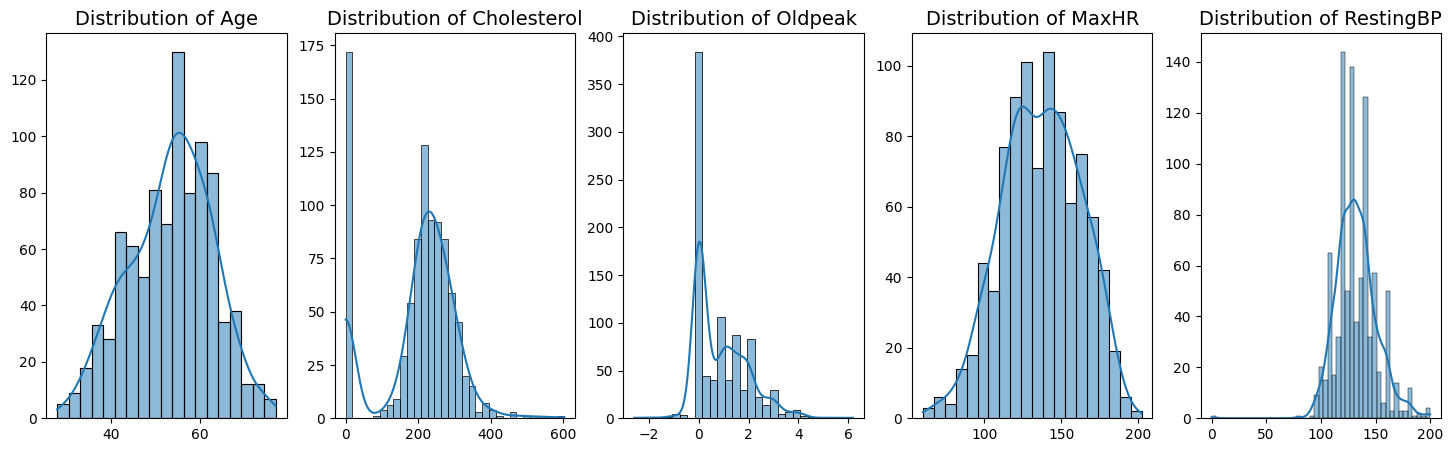

In [150]:
count_columns = ['Age','Cholesterol','Oldpeak','MaxHR','RestingBP']
fig, axis = plt.subplots(ncols=len(count_columns), figsize=(18,5))
for i, column in enumerate(count_columns):
    sn.histplot(data=df, x=column, kde=True,ax=axis[i])
    axis[i].set_title(f'Distribution of {column}', fontsize=14)
    axis[i].set_ylabel('')
    axis[i].set_xlabel('')

Some continuous features have slight skewness due to outliers.

Minor outliers exist in continuous features but align with dataset patterns.
Slight skewness in some continuous features, mainly due to outliers

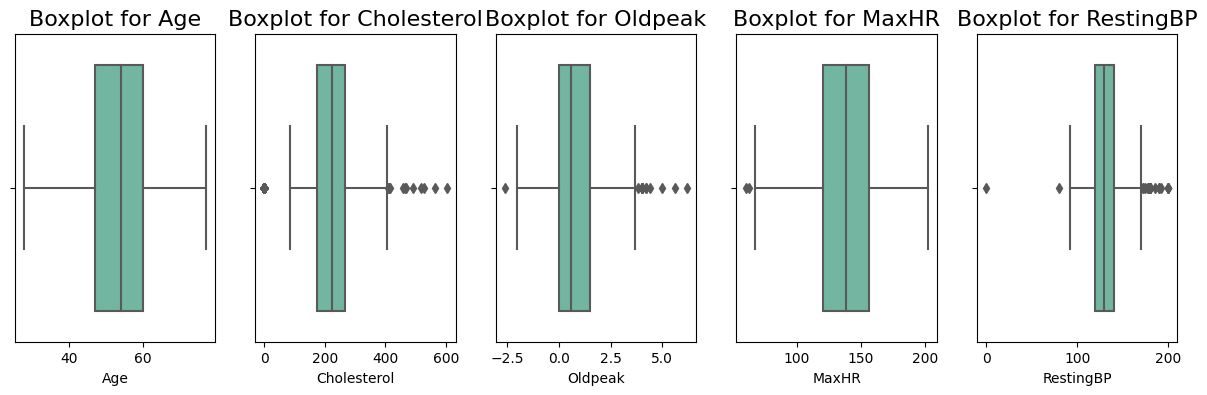

In [153]:
fig, axis = plt.subplots(1, 5, figsize=(15, 4))
for i, ax in enumerate(axis.flat):
    if i < len(count_columns):
        sn.boxplot(data=df, x=count_columns[i], ax=ax, palette='Set2', orient='h')
        ax.set_title(f'Boxplot for {count_columns[i]}', fontsize=16)

Minor Outliers were detected in the continuous features but these outliers match the dataset's overall trends and aren't data errors

the effect of age on heart rate : 

In [157]:
fig = px.histogram(df, x='Age', color='HeartDisease', title='The Effect of Age on heart disease',
                   labels={'age': 'Age', 'HeartDisease': 'HeartDisease'}, 
                   marginal='box', barmode='group',
                   color_discrete_sequence=['#1f77b4', '#ff7f0e']  
                   )

# Customizing the layout of the histogram
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=5),  # Adjusting x-axis tick settings
    bargap=0.1  # Setting the gap between bars
)
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

# Customizing the title and its position
fig.update_layout(title_font=dict(size=18), title_x=0.5, title_y=0.95)

# Customizing the background colors
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')